<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion_Detection

Dataset [Link](https://www.kaggle.com/jangedoo/utkface-new)

In [ ]:
path1 = r"/content/drive/MyDrive/Colab/Kaggle/UTKFace"
path2 = r"/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
files=os.listdir(path2)
print(files)

['happy', 'anger', 'sadness', 'disgust', 'contempt', 'surprise', 'fear']


In [ ]:
Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']


In [ ]:
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total = path2 + '/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S061_002_00000014.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S075_006_00000025.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S032_006_00000015.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S011_006_00000012.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S052_004_00000033.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S136_006_00000020.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S108_008_00000012.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S056_004_00000018.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S070_003_00000016.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S130_013_00000014.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S098_004_00000015.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S116_007_00000017.png   2
/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48/happy/S064_003_00000024.png   2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print(last)
folder_list =  ['happy', 'anger', 'sadness', 'disgust', 'contempt', 'surprise', 'fear']
# Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']

[207, 342, 426, 603, 657, 906, 981]


In [ ]:
idx = last.index(207)
print(folder_list[idx])

happy


happy


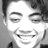

anger


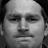

sadness


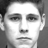

disgust


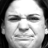

contempt


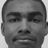

surprise


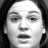

fear


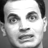

In [ ]:
for i in last:
  idx = last.index(i)
  print(folder_list[idx])
  cv2_imshow(images[i-1])

# Fear

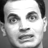

In [ ]:
cv2_imshow(images[980])


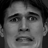

In [ ]:
cv2_imshow(images[910])

# Contempt

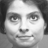

In [ ]:
cv2_imshow(images[655])

# Happy

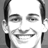

In [ ]:
cv2_imshow(images[200])

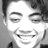

In [ ]:
cv2_imshow(images[206])

In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
images_f=np.array(images)
labels_f=np.array(labels)

images_f_2=images_f/255

In [ ]:
images_f_2.shape

(981, 48, 48, 3)

In [ ]:
num_of_classes = 7  # len(labels)
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25)

## Model


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
p = "/content/drive/MyDrive/Colab/DL/CKPLUS"

In [ ]:
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x


def model():
  input_shape = (48,48,3)
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(7,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
  print(model.summary())
  plot_model(model, to_file=p+'/model101.png')
  return Model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [ ]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')
    
    return model

In [ ]:
Model = create_model()

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
Model=model()
# Model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_31 (Dropout)         (None, 24, 24, 64)        0   

# Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s = p + '/Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
History=Model.fit(X_train,Y_train, batch_size=32, validation_data=(X_test,Y_test), epochs=1000, callbacks=[callback_list])

Epoch 1/1000
23/23 [==============================] - 46s 48ms/step - loss: 1.8984 - accuracy: 0.1942 - val_loss: 1.7934 - val_accuracy: 0.2561

Epoch 00001: loss improved from inf to 1.86390, saving model to /content/drive/MyDrive/Colab/DL/CKPLUS/Emotion_detection.h5
Epoch 2/1000
23/23 [==============================] - 0s 10ms/step - loss: 1.7448 - accuracy: 0.3402 - val_loss: 1.5406 - val_accuracy: 0.6341

Epoch 00002: loss improved from 1.86390 to 1.69262, saving model to /content/drive/MyDrive/Colab/DL/CKPLUS/Emotion_detection.h5
Epoch 3/1000
23/23 [==============================] - 0s 11ms/step - loss: 1.3680 - accuracy: 0.5453 - val_loss: 0.9801 - val_accuracy: 0.6829

Epoch 00003: loss improved from 1.69262 to 1.29736, saving model to /content/drive/MyDrive/Colab/DL/CKPLUS/Emotion_detection.h5
Epoch 4/1000
23/23 [==============================] - 0s 12ms/step - loss: 1.0005 - accuracy: 0.6320 - val_loss: 0.7398 - val_accuracy: 0.7276

Epoch 00004: loss improved from 1.29736 to 

In [ ]:
# Evaluation
score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
Pred=Model.predict(X_test)

In [ ]:
Pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.6351725e-37, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
len(Pred)

246

In [ ]:
images_f

array([[[[ 85,  85,  85],
         [ 81,  81,  81],
         [ 62,  62,  62],
         ...,
         [ 64,  64,  64],
         [ 65,  65,  65],
         [ 81,  81,  81]],

        [[ 84,  84,  84],
         [ 71,  71,  71],
         [ 36,  36,  36],
         ...,
         [ 62,  62,  62],
         [ 66,  66,  66],
         [ 72,  72,  72]],

        [[ 79,  79,  79],
         [ 47,  47,  47],
         [ 14,  14,  14],
         ...,
         [ 54,  54,  54],
         [ 64,  64,  64],
         [ 62,  62,  62]],

        ...,

        [[ 66,  66,  66],
         [ 67,  67,  67],
         [ 68,  68,  68],
         ...,
         [  2,   2,   2],
         [  1,   1,   1],
         [  5,   5,   5]],

        [[ 65,  65,  65],
         [ 66,  66,  66],
         [ 67,  67,  67],
         ...,
         [ 33,  33,  33],
         [ 36,  36,  36],
         [ 54,  54,  54]],

        [[ 66,  66,  66],
         [ 67,  67,  67],
         [ 67,  67,  67],
         ...,
         [ 78,  78,  78],
        

In [ ]:
labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

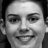

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(72,images_f, images_f_2, Model)

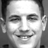

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(36,images_f,images_f_2,Model)

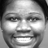

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(122,images_f,images_f_2,Model)

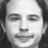

Label actual:  contempt
Predicted Label: contempt


In [ ]:
test_image(612,images_f,images_f_2,Model)

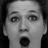

Label actual:  surprise
Predicted Label: surprise


In [ ]:
test_image(827,images_f,images_f_2,Model)

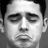

Label actual:  sadness
Predicted Label: sadness


In [ ]:
test_image(400,images_f,images_f_2,Model)

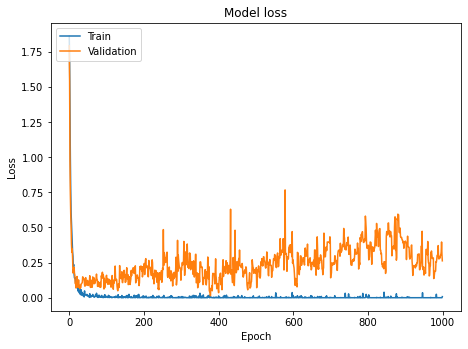

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

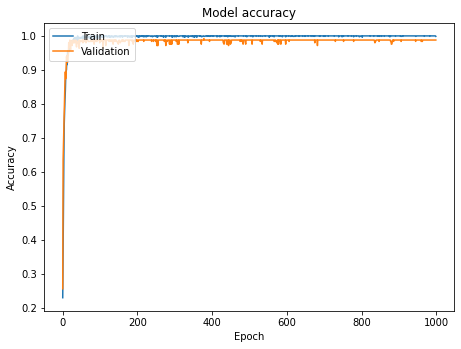

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [ ]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1

In [ ]:
report=classification_report(Y_test_l, Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        59
           3       0.90      1.00      0.95        28
           4       1.00      1.00      1.00        63
           5       1.00      0.93      0.96        43
           6       1.00      1.00      1.00        26

    accuracy                           0.99       246
   macro avg       0.99      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246



In [ ]:
results = confusion_matrix(Y_test_l, Pred_l)

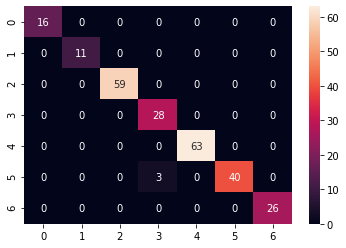

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True)